# Dynamische Systeme und Matrizen

Diese Notebook demonstriert den Einsatz von Matrizen und deren Eigenwerten bei der Analyse von dynamischen Systemen. 

Zunähst Modellieren wir ein System mit 3 Zuständen. Wir modellieren den Unterricht an der MDW und versuchen vorherzusagen ws geschieht. Es gibt 3 Möglichkeiten:
- Regulärer Unterricht
- Prüfung
- Ferien

Wir bestimmen die übergangswahrscheinlichkeiten dieses Systems:
- Wenn regulärer Unterricht stattfindet schätzen wir dass am nächtsen Tag:
    - regulärer Unterricht: 80% Wahrscheinlichkeit 
    - Prüfung: 10% Wahrscheinlichkeit 
    - Ferien: 10% Wahrscheinlichkeit 
- Wenn eine Prüfung stattfindet schätzen wir dass am nächtsen Tag:
    - regulärer Unterricht: 30% Wahrscheinlichkeit 
    - Prüfung: 40% Wahrscheinlichkeit 
    - Ferien: 30% Wahrscheinlichkeit 
- Wenn Ferien sein, schätzen wir dass am nächtsen Tag:
    - regulärer Unterricht: 40% Wahrscheinlichkeit 
    - Prüfung: 10% Wahrscheinlichkeit 
    - Ferien: 50% Wahrscheinlichkeit  

Diese Wahrscheinlichkeiten können wir nun in eine Matrix verpacken und simulieren wie sich dieses Probabilistische System entwickelt.

$$
\begin{equation}
\mathbf{A}  = \left[ \begin{matrix} 0.8 & 0.3 & 0.4 \\
                                    0.1 & 0.4 & 0.1 \\
                                    0.1 & 0.3 & 0.5 
                   \end{matrix} \right]
\end{equation}
$$


In [1]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## Use matrizes to model probabilistic evolving systems (Markov)
See also: https://www.youtube.com/watch?v=K-8F_zDMDUI&list=PLMrJAkhIeNNTYaOnVI3QpH7jgULnAmvPA&index=3

In [2]:
A = array([[0.8, 0.3, 0.4],
          [0.1, 0.4, 0.1],
          [0.1, 0.3, 0.5]])
A

array([[0.8, 0.3, 0.4],
       [0.1, 0.4, 0.1],
       [0.1, 0.3, 0.5]])

In [3]:
x_0 = array([[1, 0, 0]]).T
# for i in range(20):

In [4]:
x_0

array([[1],
       [0],
       [0]])

[[0.64285715]
 [0.14285714]
 [0.21428571]]


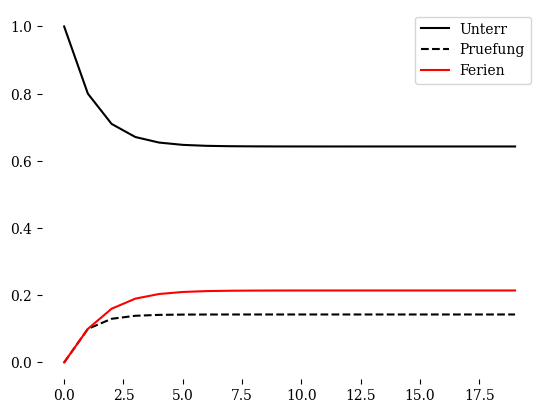

In [5]:
x_n = x_0
N = 20
xs = np.zeros([3, N])
for i in range(N):
    xs[:,i] = x_n[:,0]
    x_n = A@x_n

print(x_n)
plot(xs.T, label=['Unterr','Pruefung','Ferien']);

legend();

In [6]:
λs, Vs = eig(A)
print(λs)
print(Vs)

[1.  0.4 0.3]
[[-9.28279122e-01 -7.07106781e-01 -4.08248290e-01]
 [-2.06284249e-01  6.10394498e-16 -4.08248290e-01]
 [-3.09426374e-01  7.07106781e-01  8.16496581e-01]]


Use the eigenvector corresponding to $\lambda = 1$, normalize it (so probabilities add up to 1):

In [30]:
M = argmax(λs)
Vs[:,M]/(Vs[:,M].sum())

array([0.64285714, 0.14285714, 0.21428571])

The same as the final probablity state of the system!

[[0.68566061]
 [0.62575692]
 [0.68858248]]


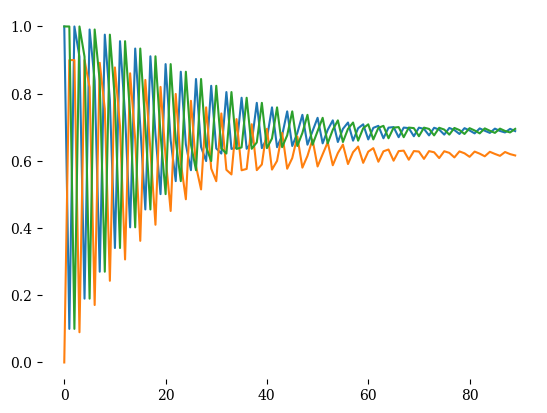

In [8]:
# Define the cyclic transition matrix
A = np.array([
    [0, 1, 0.1],
    [0, 0, 0.9],
    [1, 0, 0]
])

x_0 = array([[1,0,1]]).T
x_n = x_0
N = 90
xs = np.zeros([3, N])
for i in range(N):
    xs[:,i] = x_n[:,0]
    x_n = A@x_n

print(x_n)
plot(xs.T);


In [9]:
λs, Vs =eig(A)
λs

array([ 1. +0.j        , -0.5+0.80622577j, -0.5-0.80622577j])

### Complex eigenvalues in Markov systems indicate oscillatory behavior.
If the manitudes of the complex eigenvalues are < 1, they decay over time, leaving the steady state associated to the $\lambda=1$ eigenvalue. If they have magnitude 1, they dont decau and we see non convergent oscillattory behavior.

## Eigenvalues in State Space System Description

In [10]:
import scipy.signal as sig

In [11]:
num = [10, 3]
den = np.array([1 , 3 , 2])
sys = sig.TransferFunction(num, den)

In [12]:
sys.poles

array([-2., -1.])

In [13]:
sys.zeros

array([-0.3])

In [14]:
ω, mag, ϕ = sig.bode(sys)

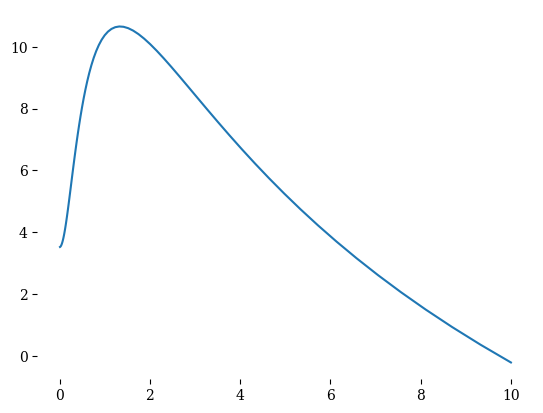

In [15]:
plot(ω, mag)

In [16]:
ss_sys = sys.to_ss()

In [17]:
λ, Vs = eig(ss_sys.A)

In [18]:
λ

array([-2., -1.])